Importing Dependencies

In [60]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.metrics import accuracy_score
from sklearn import metrics

In [61]:
df = pd.read_csv("/Users/shreyanshsourabh/Documents/ML projects/CarPricePrediction/cardata.csv")

In [62]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [63]:
df.shape

(301, 9)

In [64]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [65]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [66]:
df['Seller_Type'].value_counts()

Dealer        195
Individual    106
Name: Seller_Type, dtype: int64

In [67]:
df['Transmission'].value_counts()

Manual       261
Automatic     40
Name: Transmission, dtype: int64

In [68]:
df['Fuel_Type'].value_counts()

Petrol    239
Diesel     60
CNG         2
Name: Fuel_Type, dtype: int64

In [69]:
df.replace({
    "Fuel_Type":{'Petrol':0,'Diesel':1,'CNG':2},
    "Seller_Type":{'Dealer':0,'Individual':1},
    "Transmission":{'Manual':0,'Automatic':1}
    },inplace = True)

In [70]:
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,0,0,0,0
1,sx4,2013,4.75,9.54,43000,1,0,0,0
2,ciaz,2017,7.25,9.85,6900,0,0,0,0
3,wagon r,2011,2.85,4.15,5200,0,0,0,0
4,swift,2014,4.60,6.87,42450,1,0,0,0


# Data Visualisation

<Figure size 720x720 with 0 Axes>

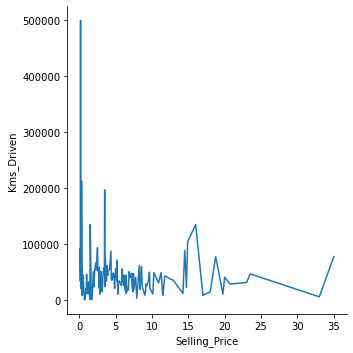

In [71]:
plt.figure(figsize = (10,10))
sns.relplot(x='Selling_Price', y = 'Kms_Driven', ci=None,kind = 'line', data= df)

# Data Splitting

In [72]:
X = df.drop(columns = ['Car_Name','Selling_Price'], axis = 1)
print(X)

     Year  Present_Price  Kms_Driven  Fuel_Type  Seller_Type  Transmission  \
0    2014           5.59       27000          0            0             0   
1    2013           9.54       43000          1            0             0   
2    2017           9.85        6900          0            0             0   
3    2011           4.15        5200          0            0             0   
4    2014           6.87       42450          1            0             0   
..    ...            ...         ...        ...          ...           ...   
296  2016          11.60       33988          1            0             0   
297  2015           5.90       60000          0            0             0   
298  2009          11.00       87934          0            0             0   
299  2017          12.50        9000          1            0             0   
300  2016           5.90        5464          0            0             0   

     Owner  
0        0  
1        0  
2        0  
3        0 

In [73]:
Y = df['Selling_Price']
print(Y)

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64


In [74]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.1, random_state = 2)
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(270, 7) (31, 7) (270,) (31,)


# Training Model Linear Regression

In [75]:
lin_reg_model = LinearRegression()

In [76]:
lin_reg_model.fit(X_train,Y_train)

LinearRegression()

## Model Evaluation

In [88]:
training_data_prediction = lin_reg_model.predict(X_train)

# R squared error
score1 = metrics.r2_score(Y_train,training_data_prediction)
print("R squared error: ",score1)

R squared error:  0.87994516604937


In [89]:
testing_data_prediction = lin_reg_model.predict(X_test)

# R squared error
score2 = metrics.r2_score(Y_test,testing_data_prediction)
print("R squared error: ",score2)

R squared error:  0.836576671502476


## Visualising Prediction

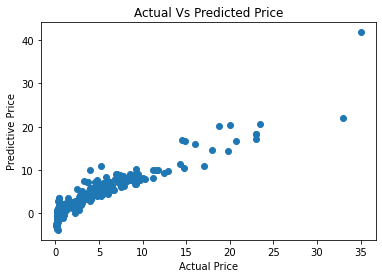

In [90]:
plt.scatter(Y_train,training_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Vs Predicted Price")
plt.show()

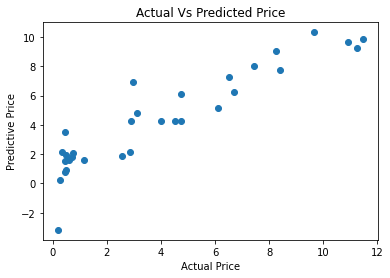

In [91]:
plt.scatter(Y_test,testing_data_prediction)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Vs Predicted Price")
plt.show()

# Training Data Lasso

In [92]:
lass_model = Lasso()

In [93]:
lass_model.fit(X_train,Y_train)

Lasso()

## Model Evaluation

In [96]:
training_data_prediction_lass = lass_model.predict(X_train)

# R squared error
score3 = metrics.r2_score(Y_train, training_data_prediction_lass)
print("R squared error: ",score3)

R squared error:  0.8427856123435794


In [97]:
testing_data_prediction_lass = lass_model.predict(X_test)

# R squared error
score4 = metrics.r2_score(Y_test, testing_data_prediction_lass)
print("R squared error: ",score4)

R squared error:  0.8709167941173195


## visualising prediction

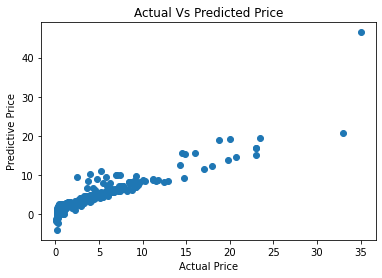

In [98]:
plt.scatter(Y_train, training_data_prediction_lass)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Vs Predicted Price")
plt.show()

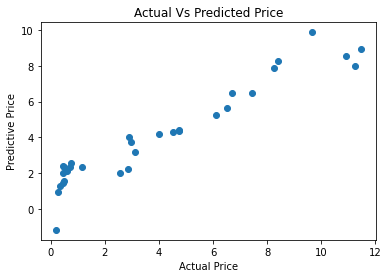

In [99]:
plt.scatter(Y_test, testing_data_prediction_lass)
plt.xlabel("Actual Price")
plt.ylabel("Predictive Price")
plt.title("Actual Vs Predicted Price")
plt.show()